In [61]:
import pandas as pd
import numpy as np
import warnings   
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [62]:
data = pd.read_csv("Diabetes data.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,0,30.1,0.349,47.0,1


In [63]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   766 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [65]:
data.isnull().sum()

Pregnancies                 0
Glucose                     2
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [66]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [67]:
X = data.drop(['Glucose', 'Pregnancies'], axis=1)  # Features
y = data['Age']  # Target variable


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming y contains continuous target values
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 9.392567245540567e-29


In [56]:
# Assuming 0 means non-diabetic and 1 means diabetic
data['Age'] = data['Age'].apply(lambda x: 1 if x > 0 else 0)

In [59]:
# Ensure that 'target' is categorical (e.g., 0 and 1)
from sklearn.linear_model import LogisticRegression
y = (y > np.median(y)).astype(int)  # Convert to binary (0 and 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy without normalization:", accuracy)

Accuracy without normalization: 1.0


##### Data Preprocessing

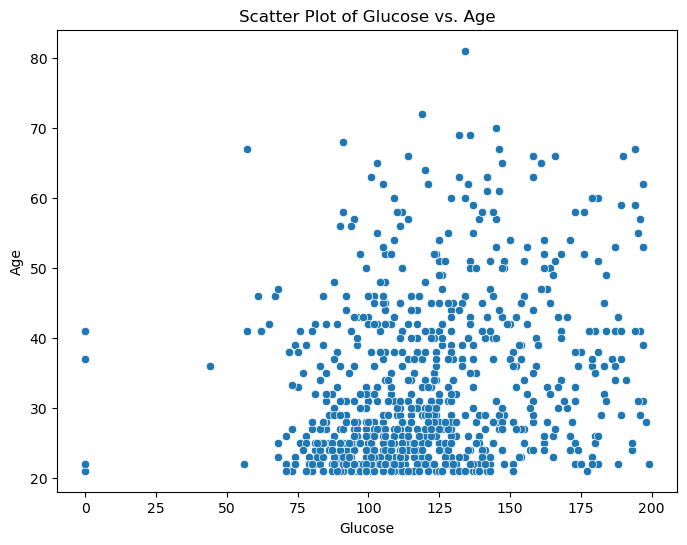

In [71]:
#outier

# Assuming you have your data loaded into a DataFrame named 'data'

plt.figure(figsize=(8, 6))  # Define the size of the figure
sns.scatterplot(x='Glucose', y='Age', data=data)
plt.title('Scatter Plot of Glucose vs. Age')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

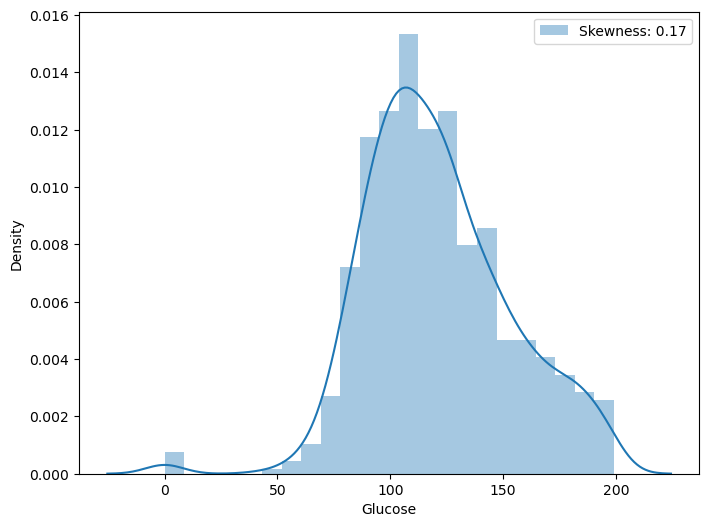

In [16]:
column_name = "Glucose"
plt.figure(figsize=(8, 6))
g = sns.distplot(data[column_name], label="Skewness: %.2f" % (data[column_name].skew()))
g.legend(loc="best")
plt.show()

##### Ridge Regression (L2-Regularization)

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a function to calculate RMSE with cross-validation
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

# Create a Ridge Regression model with alpha = 0.1
ridgeModel = Ridge(alpha=0.1)

# Calculate RMSE
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))


RMSE estimate: 0.005314481271321371, std: 0.007514506853745469


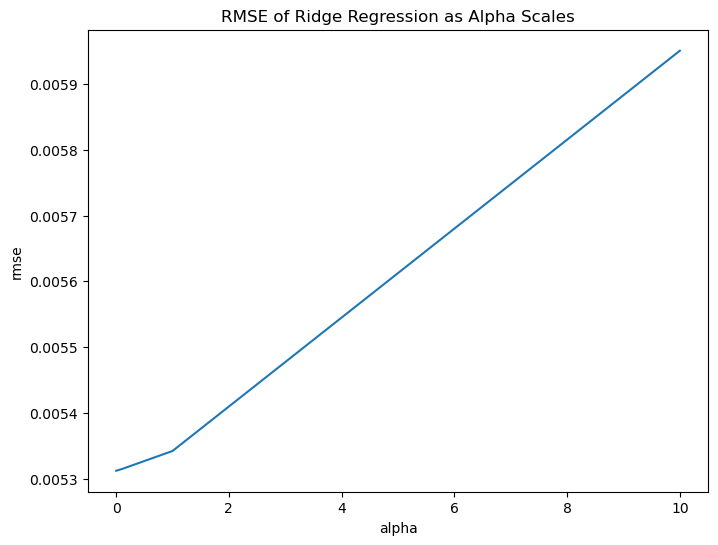

In [34]:
plt.figure(figsize=(8, 6)) # define size of figure

# calculate RMSE over several alphas
alphas = [0.001, 0.01, 0.1, 1, 10]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

# plot RMSE vs alpha
cv_ridge.plot(title = "RMSE of Ridge Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()



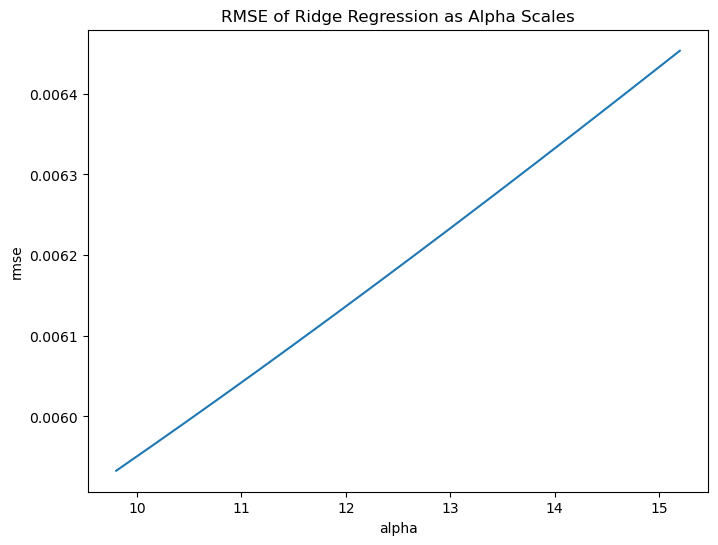

In [33]:
plt.figure(figsize=(8, 6))# define size of figure

# calculate RMSE over several alphas
alphas = np.linspace(9.8, 15.2, 541)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

# plot RMSE vs alpha
cv_ridge.plot(title = "RMSE of Ridge Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [20]:
optimalRidgeAlpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]
print("Optimal ridge alpha: {}".format(optimalRidgeAlpha))

Optimal ridge alpha: 9.8


In [21]:
# determine RMSE for ridge regression model with optimal alpha
ridgeModel = Ridge(alpha = optimalRidgeAlpha)
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.005932653255461111, std: 0.007187673089653319


##### Lasso Regression (L1-Regularization)

In [22]:
from sklearn.linear_model import Lasso

# determine RMSE for lasso regression model with alpha = 0.1
lassoModel = Lasso(alpha = 0.1)
rmse = rmse_cv(lassoModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.01109749001488714, std: 0.005700998640392022


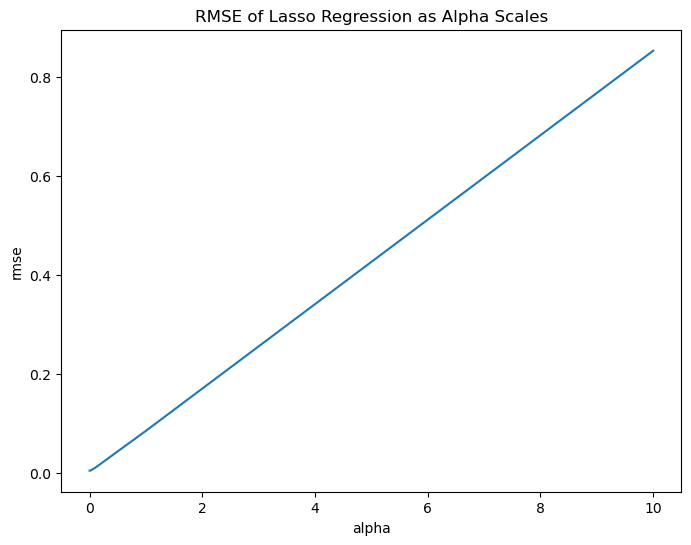

In [30]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 6)) # define size of figure
# calculate RMSE over several alphas
alphas = [0.001, 0.01, 0.1, 1, 10]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

# plot RMSE vs alpha
cv_lasso.plot(title = "RMSE of Lasso Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use LassoCV to select the best model
lassoModel = LassoCV(alphas=np.linspace(0.0002, 0.0022, 21), cv=5).fit(X_train, y_train)
optimalLassoAlpha = lassoModel.alpha_

print("Optimal lasso alpha: {}".format(optimalLassoAlpha))


Optimal lasso alpha: 0.0022


In [25]:
lassoModel = Lasso(alpha = optimalLassoAlpha)
rmse = rmse_cv(lassoModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.0051523397014793405, std: 0.007597145274569984


In [28]:
# Define a list of alpha values to test
alphas = [0.001, 0.01, 0.1, 1, 10]

# Initialize dictionaries to store RMSE values for L1 and L2 regularization
rmse_values_l1 = {}
rmse_values_l2 = {}

for alpha in alphas:
    # Train Lasso (L1) Regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    rmse_l1 = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values_l1[alpha] = rmse_l1

    # Train Ridge (L2) Regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse_l2 = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values_l2[alpha] = rmse_l2

In [29]:
# Compare RMSE values for L1 (Lasso) and L2 (Ridge) regularization
print("RMSE Values for L1 Regularization (Lasso):")
for alpha, rmse in rmse_values_l1.items():
    print(f"Alpha = {alpha}: RMSE = {rmse}")

print("\nRMSE Values for L2 Regularization (Ridge):")
for alpha, rmse in rmse_values_l2.items():
    print(f"Alpha = {alpha}: RMSE = {rmse}")

RMSE Values for L1 Regularization (Lasso):
Alpha = 0.001: RMSE = 0.0019446774302674084
Alpha = 0.01: RMSE = 0.0018955369127115521
Alpha = 0.1: RMSE = 0.009733801409997746
Alpha = 1: RMSE = 0.09665855853194334
Alpha = 10: RMSE = 0.9659816825656384

RMSE Values for L2 Regularization (Ridge):
Alpha = 0.001: RMSE = 0.0020371591722091985
Alpha = 0.01: RMSE = 0.0020375358469637067
Alpha = 0.1: RMSE = 0.0020413743040371673
Alpha = 1: RMSE = 0.0020867556886916532
Alpha = 10: RMSE = 0.003040964317201327
